### Name : Mathieu LAMIOT, Sohyeong KIM

# Chapter 3 : Object Tracking

## Part 1: Video Processing and detection. 



In this first part of chapter 3, you will be asked to construct a series of functions tools to handle video processing and basic detection. You will use the same HOG+SVM classifier from Chapter 2 and adapt it to handle video input.

In contrast to the previous assignments, in this assignment, we will not provide a guided skeleton of the function. You will use any high level (already implemented) function from OpenCV to complete the exercise specifications and outputs. In addition, you will be asked to search in the documentation (or your favourite reference) the specific usage of the functions. 

__Section Objectives:__

* Construct a Video processing pipeline.
* Use OpenCV functions on the video frames for human detection.

__Data__:

The chapter data included inside ``../data/videos`` folder contains four sample videos to test your functions.

All the functions constructed in this first part will be used in the second part of video tracking, so make sure to understand each function and how to use it.


### Reading/Writting video

A video file can be abstracted as a bunch of images in order. As a first exercise, you need to construct a function to read and operate over each frame.


In [1]:
import cv2 as cv
import numpy as np
import os
import math
import tarfile
from utils import *
import matplotlib.pyplot as plt

%matplotlib inline

#Import all the extra you may need.

In [2]:
def transformVideoFile(file_path, function, params ):
    """
    Given the path of a video file (file_path) the function reads every frame of the input video and applies a given
    transformation (function) usign the parameters (params)

    :input_image:       Input video file path 
    : function           Function be applied to each frame of the image.
    : params             Any parameter needed for the function above.
    :return:            output_handler this can be anything you may need to dave your results.
    """
    
    image = [];
    vidcap = cv.VideoCapture(file_path)
    count = 0
    output_handler = []
    second_output = []
    
    # Retrieve the parameters 
    stop_param = params[-1] # Parameters to limit the process
    if( (type(stop_param) == int) ): # Stop parameter should be a positive integer
        if(stop_param > 0):
            func_param = params[0:-1] # Parameters for the function
            stop_flag = True
        else:
            func_param = params[:] # Parameters for the function
            stop_flag = False
    else:
        func_param = params[:] # Parameters for the function
        stop_flag = False
    
    # Find the frame per second
    fps = vidcap.get(cv.CAP_PROP_FPS)
    frame_cnt = vidcap.get(cv.CAP_PROP_FRAME_COUNT)
    
    while vidcap.isOpened():
        # Capture frame-by-frame
        success, image = vidcap.read()  
        if success:
            ## For each frame in the video:
            img_handled = function(image,func_param)
            output_handler.append(img_handled)
            
            # For every second in the video:
            if(count % fps == 0):
                second_output.append(img_handled)
                print('Processing {}th frame out of {}'.format(count+1, int(frame_cnt)))
            
            # For limited length of process:
            if(stop_flag):
                if(count == (stop_param-1)):
                    print('Stopping proess at {}th frame'.format(count+1))
                    break
            
            # Update the count
            count += 1
        else:
            break
    
    # When everything done, release the video capture object
    vidcap.release()

    # Output
    all_output = output_handler
    print('Processed {} number of the frames in total.'.format(len(all_output)))
    
    return all_output, second_output

### Hints:

In [3]:
# Example of usage:
def dummy_function(image,params):
    if("dummy_function" in params[0]):
        print(params[1])
        print(params[2])
    return "I did it"


file_name = "../data/videos/video_human.avi"
dummy_params = [];
dummy_params.append("dummy_function");
dummy_params.append("Hello from the video file:")
dummy_params.append(file_name);


transformVideoFile(file_path=file_name,function=dummy_function,params=dummy_params)

Hello from the video file:
../data/videos/video_human.avi
Processing 1th frame out of 250
Hello from the video file:
../data/videos/video_human.avi
Hello from the video file:
../data/videos/video_human.avi
Hello from the video file:
../data/videos/video_human.avi
Hello from the video file:
../data/videos/video_human.avi
Hello from the video file:
../data/videos/video_human.avi
Hello from the video file:
../data/videos/video_human.avi
Hello from the video file:
../data/videos/video_human.avi
Hello from the video file:
../data/videos/video_human.avi
Hello from the video file:
../data/videos/video_human.avi
Hello from the video file:
../data/videos/video_human.avi
Hello from the video file:
../data/videos/video_human.avi
Hello from the video file:
../data/videos/video_human.avi
Hello from the video file:
../data/videos/video_human.avi
Hello from the video file:
../data/videos/video_human.avi
Hello from the video file:
../data/videos/video_human.avi
Processing 16th frame out of 250
Hello f

Hello from the video file:
../data/videos/video_human.avi
Hello from the video file:
../data/videos/video_human.avi
Hello from the video file:
../data/videos/video_human.avi
Hello from the video file:
../data/videos/video_human.avi
Hello from the video file:
../data/videos/video_human.avi
Hello from the video file:
../data/videos/video_human.avi
Hello from the video file:
../data/videos/video_human.avi
Hello from the video file:
../data/videos/video_human.avi
Hello from the video file:
../data/videos/video_human.avi
Hello from the video file:
../data/videos/video_human.avi
Hello from the video file:
../data/videos/video_human.avi
Processing 166th frame out of 250
Hello from the video file:
../data/videos/video_human.avi
Hello from the video file:
../data/videos/video_human.avi
Hello from the video file:
../data/videos/video_human.avi
Hello from the video file:
../data/videos/video_human.avi
Hello from the video file:
../data/videos/video_human.avi
Hello from the video file:
../data/vid

(['I did it',
  'I did it',
  'I did it',
  'I did it',
  'I did it',
  'I did it',
  'I did it',
  'I did it',
  'I did it',
  'I did it',
  'I did it',
  'I did it',
  'I did it',
  'I did it',
  'I did it',
  'I did it',
  'I did it',
  'I did it',
  'I did it',
  'I did it',
  'I did it',
  'I did it',
  'I did it',
  'I did it',
  'I did it',
  'I did it',
  'I did it',
  'I did it',
  'I did it',
  'I did it',
  'I did it',
  'I did it',
  'I did it',
  'I did it',
  'I did it',
  'I did it',
  'I did it',
  'I did it',
  'I did it',
  'I did it',
  'I did it',
  'I did it',
  'I did it',
  'I did it',
  'I did it',
  'I did it',
  'I did it',
  'I did it',
  'I did it',
  'I did it',
  'I did it',
  'I did it',
  'I did it',
  'I did it',
  'I did it',
  'I did it',
  'I did it',
  'I did it',
  'I did it',
  'I did it',
  'I did it',
  'I did it',
  'I did it',
  'I did it',
  'I did it',
  'I did it',
  'I did it',
  'I did it',
  'I did it',
  'I did it',
  'I did it',
  'I d

The dummy example above defines a not very useful dummy_function that only prints a message if the first parameter (we saved the name in there) is its name. Notice that, in the correct version this dummy function __should be called once per frame__.

To read videos you can use the library __imutils__: ``pip install imutils``

There are several good tutorials online using that very same library.

Importatn google terms: 
* cv2.VideoCapture
* FileVideoStream



### Testing your function:

To test your function you need to process the video: ``../data/videos/video_gym.avi``. At each frame, you will count the number of __blue__ pixel. At the end you should return two outputs:

* The __frame number__ with the maximum number of blue pixels
* The __image__ frame with more blue pixels in greyscale, except for the blue pixels.

Display the image and the frame number. 

__Hint:__ Consider a blue pixel as any pixel in the range of the blue color in HSV: 
``([90,120,120]) , [130,255,255])``. 

__Hint 2__: Check the first assignment if you have no idea what am I talking about.  


In [4]:
##### your code


def process_frame_function(image,params):
    '''
    Given image and the parameters of the range of the colors in HSV colormap, 
    this function produce the number of pixels with the colors within the range 
    and the gray scale image only emphasised in that color range. 
    
    <<Input>> 
        - image: input image in BGR color map
        - params : lower and upper range of the colors in HSV. 
                    For example, Blue : params = [[90,120,120] , [130,255,255]]
    
    <<Output>> 
        - color_counter : number of pixels of selected colors
        - output_image : gray scale image except for the selected colors.
    
    '''
    
    # Magic conversion and thresholding.
    hsv = cv.cvtColor(image, cv.COLOR_BGR2HSV)
    lower_range = np.array(params[0])
    upper_range = np.array(params[1])
    mask = cv.inRange(hsv, lower_range, upper_range)
      
    # Magic counter of selected color pixels (In this example: blue)
    h,w = mask.shape
    color_counter = 0;
    color_counter = int(np.sum(mask)/255)
    
    # Gray & Color filtered Pictures
    gray_scale_image =cv.cvtColor(cv.bitwise_and(image, image, mask=(255-mask)), cv.COLOR_BGR2GRAY);
    output_image = cv.cvtColor(cv.bitwise_and(image, image, mask=mask),cv.COLOR_BGR2RGB) \
                            + np.stack((gray_scale_image,gray_scale_image,gray_scale_image),axis=2)
        
    return [color_counter,output_image]

In [5]:
# Define the file path
file_path =  os.path.join('..','data', 'videos', 'video_gym.avi')

# Process the video
all_the_output, dummy = transformVideoFile(file_path, process_frame_function, [[90,120,120],[130,255,255]]);

Processing 1th frame out of 767
Processing 16th frame out of 767
Processing 31th frame out of 767
Processing 46th frame out of 767
Processing 61th frame out of 767
Processing 76th frame out of 767
Processing 91th frame out of 767
Processing 106th frame out of 767
Processing 121th frame out of 767
Processing 136th frame out of 767
Processing 151th frame out of 767
Processing 166th frame out of 767
Processing 181th frame out of 767
Processing 196th frame out of 767
Processing 211th frame out of 767
Processing 226th frame out of 767
Processing 241th frame out of 767
Processing 256th frame out of 767
Processing 271th frame out of 767
Processing 286th frame out of 767
Processing 301th frame out of 767
Processing 316th frame out of 767
Processing 331th frame out of 767
Processing 346th frame out of 767
Processing 361th frame out of 767
Processing 376th frame out of 767
Processing 391th frame out of 767
Processing 406th frame out of 767
Processing 421th frame out of 767
Processing 436th frame

The frame number which has maximum number of blue pixel is: 153
This frame has 5891 number of blue pixels.


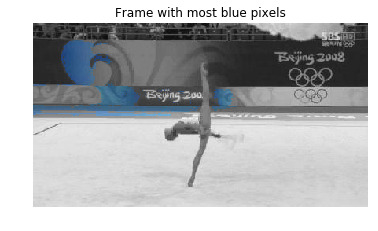

In [6]:
# Find the frame that has most blue pixels
Nmax_blue = 0        # Maximum number of blue pixels
IMAGEmax_blue = []   # Image data which has the most blue pixels
frame_num = 0        # Frame number which has the most blue pixels

for k in range(0,len(all_the_output)):
    item = all_the_output[k]
    if item[0]>Nmax_blue:
        Nmax_blue =item[0]
        IMAGEmax_blue = item[1]
        frame_num = k

        
## Be sure to display the results below:

## Frame number
print('The frame number which has maximum number of blue pixel is: {}'.format(frame_num))
print('This frame has {} number of blue pixels.'.format(Nmax_blue))
## Display image
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.imshow(IMAGEmax_blue)
ax.set_title('Frame with most blue pixels')
ax.axis('off')
plt.show()

## Exercise 2: The return of the HOG.

Do you remember HOG? No? Well, it's okay, since all you need is to remember how to use it:

Image has dimensions: (480, 640, 3)


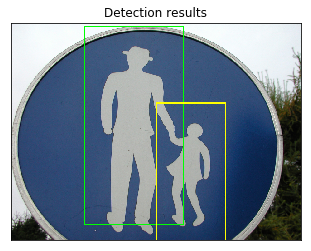

In [7]:
# initialize the HOG descriptor/person detector
hog = cv.HOGDescriptor()
hog.setSVMDetector(cv.HOGDescriptor_getDefaultPeopleDetector()) 

# load base image (check that we are not scaling, normalizing or changing the channels)
img = cv.imread(os.path.join('..','data', 'person_454.bmp'))
print('Image has dimensions: {}'.format(img.shape))

# The HOG detector returns an array with the Regions of maximum likehood to contain a human-shaped-form
rects, weights = hog.detectMultiScale(img , winStride=(4, 4), padding=(8, 8), scale=1.05)

# draw the original bounding boxes
persons = 0;
for (x, y, w, h) in rects:
    cv2.rectangle(img , (x, y), (x + w, y + h), (0, 255, persons * 256), 2)
    persons += 1;
    
display_image(img);
plt.title('Detection results')
plt.xticks([])
plt.yticks([]);

Finally, you will glue together your brand new image processing function and the HOG descriptor from OpenCV above.

### Testing your function:

To test your function you need to process the video: ``../data/videos/video_skater.avi``. At each frame, you will use HOG to detect any person in the frame. At the end of the function you should return: 

* The image __frame__ corresponding to __the seconds 1, 2, ... , 10__ of the video with the rectangle showing the "detected area". 

__Hint __: Check the second assignment if you have no idea what am I talking about.

__Be sure to display all the 10 frames for grading__


In [8]:
def frame_HOG(image,params):
    
    #Retrieve the parameters
    WINSTRIDE = params[0]
    PADDING = params[1]
    SCALE = params[2]    
    
    # Do HOG calculation
    rects, weights = hog.detectMultiScale(image , winStride = WINSTRIDE, padding = PADDING, scale = SCALE)
    
    return [rects,image]

In [9]:
# Define the file path
file_path =  os.path.join('..','data', 'videos', 'video_skater.avi')

# Set the parameters for the HOG
#params_HOG = {'winStride':(3, 3), 'padding':(8, 8), 'scale':1.03}
params_HOG = [(3, 3), (8, 8), 1.03]
# Process the video
dummy, all_the_output = transformVideoFile(file_path, frame_HOG, params_HOG);

Processing 1th frame out of 160
Processing 16th frame out of 160
Processing 31th frame out of 160
Processing 46th frame out of 160
Processing 61th frame out of 160
Processing 76th frame out of 160
Processing 91th frame out of 160
Processing 106th frame out of 160
Processing 121th frame out of 160
Processing 136th frame out of 160
Processing 151th frame out of 160
Processed 160 number of the frames in total.


In [10]:
def into_oneBox(rects, x_thresh, y_thresh):
    '''
    Take several rectangular information and make it into one retangular information by averaging. 
    
    <<INPUT>>
        - rects : List of rectangular information (x,y,w,h)
        - x_thresh : starting point of the x position of our interest
        - y_thresh : starting point of the y position of our interest
        
    <<OUTPUT>>
        - outBox : One rectangular information (x,y,w,h)
    
    '''
    
    if(len(rects) == 1):
        return rects
    
    outBox =np.empty((1,4))
    x = 0
    y = 0
    w = 0
    h = 0
    count = 0
    
    for elements in rects:
        # Consider the rectangulars which are within our interest
        if((elements[0] > x_thresh) & (elements[1] > y_thresh)):
            x += elements[0]
            y += elements[1]
            w += elements[2]
            h += elements[3]
            count += 1
    
    # Get the average of the values
    outBox[0,0] = x / count
    outBox[0,1] = y / count
    outBox[0,2]= w / count
    outBox[0,3] = h / count
    
        
    return outBox.astype(np.int)

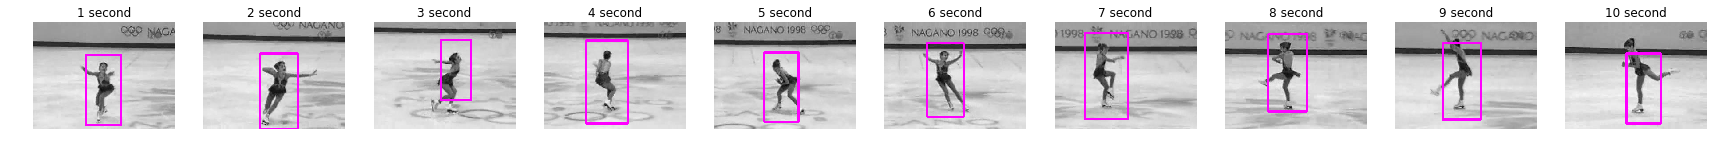

In [11]:
# Display the results
fig, ax = plt.subplots(1, 10, figsize=(30, 30))
for k in range(1,11):
    item = all_the_output[k]
    rects = item[0]
    image = item[1]

    # Get the only one box 
    pick = into_oneBox(rects, 50, 40)
    
    for (x, y, w, h) in pick:
        cv2.rectangle(image , (x, y), (x + w, y + h), (255, 0, 255), 3)
        persons +=1
    ax[k-1].imshow(image)
    ax[k-1].set_title('{} second'.format(k))
    ax[k-1].axis('off')
plt.show()

**Final comments**


In order to detect the skaters for each second of the video(1,2, ... ,10), we look for the frame per second(fps) and define another list called 'second_output' which is storing only frames in each second of the video. 

When we set the parameters of the HOG, 'winStride' as (3, 3) and  'scale' as 1.03 gives the best detection. When having the larger winStride, it speeds up the detection process but it misses out the detection on some of the frames. Setting larger scale also decrease the accuracy of the detection and thus we choosed a smaller scale even though it increases the processing time. 

For some frames, more than one part of the image was detected as a person. Thus, we have defined a function which merge several detections into one. Giving a threshold values of the (x,y) position, this function averages the relevant detected values. 

Finally, we could detect the skaters for all the frames for each second of the video. 